# NANUQ networks reconstructions

In [1]:
#Imports
import toytree
import toyplot.pdf
import pandas as pd
import ipyrad.analysis as ipa

ipa.__version__

'0.9.84'

## Getting trees with treeslider

In [2]:
#Sequences file
SEQS = "/home/cm2828/project/viburnumThings/data/Aug2022_lookingforBolivianSamples/bolivia_history_outfiles/bolivia_history.seqs.hdf5"

In [4]:
# Get the biggest 100 scaffolds to use only
scaff = ipa.treeslider(SEQS)
scaff_table = scaff.scaffold_table.sort_values(by="scaffold_length", ascending=False)
display (scaff_table)

#use 100 biggest scaffolds
scaff_toUse = scaff_table.index[:1000].tolist()
print (scaff_toUse)

,scaffold_name,scaffold_length
3588,Scaffold_3589;HRSCAF=4012,47665733
28086,Scaffold_28087;HRSCAF=31587,44977913
17364,Scaffold_17365;HRSCAF=19499,36021024
62490,Scaffold_62491;HRSCAF=74262,28015097
61137,Scaffold_61138;HRSCAF=69458,27022671
...,...,...
56530,Scaffold_56531;HRSCAF=63672,1000
47705,Scaffold_47706;HRSCAF=53707,1000
2963,Scaffold_2964;HRSCAF=3308,1000
28804,Scaffold_28805;HRSCAF=32399,1000


[3588, 28086, 17364, 62490, 61137, 45956, 8703, 9533, 48436, 2632]


In [4]:
tt = ipa.window_extracter(SEQS,name="test_visual_bigScaffold", scaffold_idxs=3588)

In [5]:
tt.run(nexus=True)

Wrote data to /gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/nanuq_astral/analysis-window_extracter/test_visual_bigScaffold.nex


In [14]:
from Bio import AlignIO
from Bio.Align import AlignInfo
from PIL import Image
import os

def get_pic_align(alignment_file, 
                  alignment_format="fasta", 
                  colors = {"A": (90, 228, 93),
                            "C": (90, 90, 230),
                            "G": (226, 230, 90),
                            "T": (230, 90, 90)
                           },
                  print_name = True,
                  resize = (-1, -1),
                  window = (0, -1)
                 ):

    #open file and get sequence
    alignment = AlignIO.read(alignment_file, alignment_format)
    summary_align = AlignInfo.SummaryInfo(alignment)

    fasta_name = os.path.basename(alignment_file).split(".")[0]
    
    #define default window
    if window[0] < 0:
        window_start = 0
    else:
        window_start = window[0]
    
    if window[1] < 0:
        window_end = alignment.get_alignment_length()
    else:
        window_end = window[1]

    width = window_end
    height = len(alignment)

    picalign = Image.new( 'RGB', (width, height), "white")
    pixels = picalign.load()

    codes = colors
   

    for col in range(window_start, window_end):
        column = summary_align.get_column(col)

        for pos, base in enumerate(summary_align.get_column(col)):
            base = base.upper()

            if base not in codes.keys(): 
                color = (255, 255, 255)
            else:
                color = codes[base]


            pixels[col, pos] = color
            
    if print_name: print(f"{alignment_file} - seqs: {height}, length: {width}")
    
    if resize[0] > 0 and resize[1] > 0:
        picalign = picalign.resize((resize[0],resize[1]), resample=0)
    
    return picalign

/gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/nanuq_astral/analysis-window_extracter/test_visual_bigScaffold.nex - seqs: 80, length: 2000


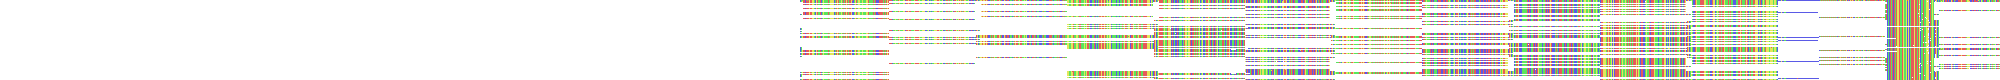

In [23]:
get_pic_align("/gpfs/ysm/project/edwards/cm2828/viburnumThings/bolivia/notebooks/nanuq_astral/analysis-window_extracter/test_visual_bigScaffold.nex", 
              alignment_format="nexus",
              window=(800, 2000), 
              # resize=(10000,600)
             )

In [5]:
# Load database to build imap
import dbgdrive
fulldata = dbgdrive.get_database(sheet_name='sample-data', id_spreadsheet='**', api_key='**')

In [6]:
# #create imap

# ## import collections to create an empty dict
# from collections import defaultdict

# #create empty dict
# imap = defaultdict(list)
# #go row by row
# for index, row in fulldata.iterrows():
#     #only check fulldataset specimens
#     if row["full_dataset_withAyava"]:
#         #append each NamInAssembly to the key Lastest_SP_name
#         imap[row["Lastest_SP_name"]].append(row["NameInAssembly"])

# #show IMAP 
# imap

In [7]:
# create imap with only incaseedum clade samples
incaseedum = ['seemenii_f_minus_PWS_3910',
 'seemenii_f_bolivianum_PWS_3909',
 'seemenii_f_minus_PWS_3913',
 'seemenii_f_minus_PWS_3911',
 'seemenii_f_minus_PWS_3912',
 'seemenii_PWS_3898',
 'seemenii_PWS_3900',
 'seemenii_PWS_3899',
 'seemenii_PWS_3894',
 'seemenii_PWS_3895',
 'seemenii_PWS_3896',
 'seemenii_PWS_3897',
 'seemenii_f_minus_PWS_3897',
 'ayavacense_PWS_3902',
 'ayavacense_PWS_3903',
 'ayavacense_PWS_3901',
 'ayavacense_PWS_3907',
 'ayavacense_PWS_3904',
 'ayavacense_PWS_3905',
 'ayavacense_PWS_3908',
 'ayavacense_PWS_3906',
 'ayavacense_PWS_3886',
 'ayavacense_PWS_3887',
 'ayavacense_PWS_3892',
 'ayavacense_PWS_3888',
 'ayavacense_PWS_3889',
 'ayavacense_PWS_3890',
 'ayavacense_PWS_3893',
 'ayavacense_PWS_3891',
 'ayavacense_PWS_3884',
 'ayavacense_PWS_3883',
 'ayavacense_PWS_3885',
 'seemenii_Maldonado_3040',
 'seemenii_Fuentes_4724',
 'seemenii_Fuentes_8750',
 'hallii_PWS_4025',
 'hallii_PWS_4023',
 'hallii_PWS_4021',
 'hallii_PWS_4022',
 'hallii_PWS_4020',
 'hallii_PWS_4024',
 'incarum_PWS_4030',
 'incarum_PWS_4026',
 'incarum_PWS_4029',
 'incarum_PWS_4027',
 'incarum_PWS_4028']

In [8]:
# Edwards_2014_04, PWS_4011, PWS_4002, and PWS_1769.
outgroup  = ["triphyllum_Edwards_2014_04",
             "triphyllum_PWS_4011",
             "ayavacense_PWS_4002",
             "triphyllum_PWS_1769"
]

In [9]:
IMAP = {
    "outgroup": outgroup,
    "ingroup": incaseedum,
}

# IMAP

In [16]:
IMAP

{'outgroup': ['triphyllum_Edwards_2014_04',
  'triphyllum_PWS_4011',
  'ayavacense_PWS_4002',
  'triphyllum_PWS_1769'],
 'ingroup': ['seemenii_f_minus_PWS_3910',
  'seemenii_f_bolivianum_PWS_3909',
  'seemenii_f_minus_PWS_3913',
  'seemenii_f_minus_PWS_3911',
  'seemenii_f_minus_PWS_3912',
  'seemenii_PWS_3898',
  'seemenii_PWS_3900',
  'seemenii_PWS_3899',
  'seemenii_PWS_3894',
  'seemenii_PWS_3895',
  'seemenii_PWS_3896',
  'seemenii_PWS_3897',
  'seemenii_f_minus_PWS_3897',
  'ayavacense_PWS_3902',
  'ayavacense_PWS_3903',
  'ayavacense_PWS_3901',
  'ayavacense_PWS_3907',
  'ayavacense_PWS_3904',
  'ayavacense_PWS_3905',
  'ayavacense_PWS_3908',
  'ayavacense_PWS_3906',
  'ayavacense_PWS_3886',
  'ayavacense_PWS_3887',
  'ayavacense_PWS_3892',
  'ayavacense_PWS_3888',
  'ayavacense_PWS_3889',
  'ayavacense_PWS_3890',
  'ayavacense_PWS_3893',
  'ayavacense_PWS_3891',
  'ayavacense_PWS_3884',
  'ayavacense_PWS_3883',
  'ayavacense_PWS_3885',
  'seemenii_Maldonado_3040',
  'seemenii_F

In [10]:
# set treeslider parameters 
ts = ipa.treeslider(
    name="1_treesliderForNanuq",
    data=SEQS,
    workdir="analysis-treeslider",
    scaffold_idxs=scaff_toUse,
    window_size=2000000,
    slide_size=2000000,
    inference_method="raxml",
    inference_args={"N": 100, "T": 1},
    minsnps=10,
    mincov=9,
    imap=IMAP,
#     minmap= {i: 0 for i in imap},
    # consensus_reduce=True
)

In [11]:
# set parallelization parameters
ts.ipcluster['cores'] = 30
ts.ipcluster['threads'] = 2

In [12]:
ts.show_inference_command()

/gpfs/ysm/project/edwards/cm2828/conda_envs/ipyrad_from_conda/bin/raxmlHPC-PTHREADS-AVX2 -f a -T 2 -m GTRGAMMA -n ... -w ... -s ... -p 54321 -N 100 -x 12345


In [13]:
# ipcluster start --n=50 --cluster-id='1'
# import ipyparallel as ipp
# ipyclient = ipp.Client(cluster_id="1")

In [14]:
# len(ipyclient.ids)

In [15]:
# Run treeslider
# ts.run(ipyclient=ipyclient, force=True, show_cluster=True)

ts.run(auto=True, force=True, show_cluster=True)

Parallel connection | c17n09.farnam.hpc.yale.internal: 30 cores
building database: nwindows=143; minsnps=10
[                    ]   0% 0:00:20 | inferring trees 
Keyboard Interrupt by user

Error: ipcluster shutdown and must be restarted



KeyboardInterrupt



In [30]:
ts.tree_table.head()

,scaffold,start,end,sites,snps,samples,missing,tree
0,126,0,2000000,9889,116,50,0.53,"(ayavacense_PWS_3907:0.00169024,(triphyllum_PWS_1769:0.00101933,(ayavacense_PWS_3890:0.000247475,(ayavacense_PWS_3906:0.00149735,(ayavacense_PWS_3887:0.00103988,(seemenii_PWS_3900:0.00134779,((seemenii_f_minus_PWS_3897:0.000730542,ayavacense_PWS_..."
1,126,2000000,4000000,9603,125,50,0.53,"(ayavacense_PWS_3885:0.00062865,((ayavacense_PWS_3888:1e-06,ayavacense_PWS_3887:0.000654385)16:0.000834877,(ayavacense_PWS_3904:1e-06,(ayavacense_PWS_3893:0.00266444,ayavacense_PWS_3889:0.000672735)1:1e-06)0:0.000512279)0:0.000634774,(ayavacense_..."
2,126,4000000,6000000,7190,86,50,0.53,"(hallii_PWS_4021:1e-06,hallii_PWS_4025:1e-06,((ayavacense_PWS_3883:0.000435596,seemenii_f_minus_PWS_3912:0.000956081)12:0.000426507,(((ayavacense_PWS_3905:0.00214204,(ayavacense_PWS_3885:0.000483725,seemenii_Maldonado_3040:0.000887765)42:0.000685..."
3,126,6000000,8000000,9603,83,50,0.56,"(ayavacense_PWS_3883:1e-06,ayavacense_PWS_3884:1e-06,((triphyllum_PWS_4011:0.00083658,(seemenii_Fuentes_8750:0.000942062,(ayavacense_PWS_3901:0.00154883,(ayavacense_PWS_3890:1e-06,(ayavacense_PWS_3887:0.00101865,ayavacense_PWS_3892:0.00182843)23:..."
4,647,0,2000000,5873,80,50,0.58,"(triphyllum_PWS_4011:0.000766729,(ayavacense_PWS_3905:0.000419936,(ayavacense_PWS_3886:1e-06,ayavacense_PWS_3890:1e-06)20:0.00220889)12:0.00038119,(ayavacense_PWS_3883:1e-06,(ayavacense_PWS_3888:0.00173612,((ayavacense_PWS_3901:0.000348972,(ayava..."


In [33]:
#Check slides that have more than 300 snps
len(ts.tree_table[ts.tree_table.snps > 300].tree)

24

In [34]:
#Check slides that have more than 300 snps
len(ts.tree_table[ts.tree_table.snps > 200].tree)

163

In [35]:
#Check slides that have more than 300 snps
len(ts.tree_table[ts.tree_table.snps > 100].tree)

465

In [36]:
#Save tree into a full newick useful for Astral and for NANUQ
for minsnps in [100, 200, 300]:
    noNANtsTable = ts.tree_table.dropna()
    outfile = open(f"analysis-treeslider/raxmlTrees_{ts.name}_{minsnps}snps.nwk", "w")
    outfile.write("\n".join(noNANtsTable[noNANtsTable.snps > minsnps].tree.tolist()))
    outfile.close()

In [ ]:
### The following part was done locally

In [ ]:
%load_ext rpy2.ipython
#Installed from pip install rpy2

In [ ]:
%%R
#install library in console where NANUQ algoritm is
# install.packages("MSCquartets")

#load library
library("MSCquartets")

#Run nanuq
nanuqDist = NANUQ("/home/carlos/GDRIVE/viburnumThings/Viburnum-Oreinotinus/notebooks/Mar2021/analysis-treeslider/raxmlTrees_window2mb_msnip10_mcov9_IMAPED_100biggestScaff_300snps.nwk", 
      outfile = "/home/carlos/GDRIVE/viburnumThings/Viburnum-Oreinotinus/notebooks/Mar2021/analysis-treeslider/NANUQdist_a0.05b0.95", 
      alpha = 0.05, 
      beta = 0.95,
      taxanames = NULL, #Names in the first tree are used  otherwise a vector with all names is required
      plot = TRUE) #Plot hypothesis triangular plots (simplex plot)

In [ ]:
#Outfile is processed locally in splittree GUI version